### Data Exploration and Preprocessing:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn

In [ ]:
# Import data
dataset = pd.read_csv("TCGA_GBM_LGG_Mutations_all.csv")
df = pd.DataFrame(dataset)
df.head()

,sample_id,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,1,LGG,Male,51 years 108 days,white,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
1,2,LGG,Male,38 years 261 days,white,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
2,3,LGG,Male,35 years 62 days,white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
3,4,LGG,Female,32 years 283 days,white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED
4,5,LGG,Male,31 years 187 days,white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


In [ ]:
data = pd.read_excel("test.xlsx")
data_test = pd.DataFrame(data)
data_test.head()

,sample id,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,1,GBM,Female,41 years 116 days,white,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
1,2,GBM,Female,53 years 258 days,white,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
2,3,GBM,Male,34 years 237 days,white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
3,4,GBM,Female,51 years 350 days,white,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
4,5,GBM,Female,30 years 32 days,white,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


In [ ]:
df_concatenated = pd.concat([df, data], axis=0, ignore_index=True)

In [ ]:
df_concatenated.shape

(862, 26)

In [ ]:
# Identify missing value

df_concatenated.replace("--", float("NaN"), inplace=True)
df_concatenated.replace("not reported", float("NaN"), inplace=True)
df_concatenated.isnull().sum()

sample_id            16
Grade                 0
Gender                4
Age_at_diagnosis      5
Race                 22
IDH1                  0
TP53                  0
ATRX                  0
PTEN                  0
EGFR                  0
CIC                   0
MUC16                 0
PIK3CA                0
NF1                   0
PIK3R1                0
FUBP1                 0
RB1                   0
NOTCH1                0
BCOR                  0
CSMD3                 0
SMARCA4               0
GRIN2A                0
IDH2                  0
FAT4                  0
PDGFRA                0
sample id           846
dtype: int64

In [ ]:
X = df_concatenated.drop('Grade', axis=1)
X = X.drop('sample_id', axis=1)
X = X.drop('sample id', axis=1)
X.head()

,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,Male,51 years 108 days,white,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
1,Male,38 years 261 days,white,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
2,Male,35 years 62 days,white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
3,Female,32 years 283 days,white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED
4,Male,31 years 187 days,white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


In [ ]:
Y = df['Grade']
Y.head()

0    LGG
1    LGG
2    LGG
3    LGG
4    LGG
Name: Grade, dtype: object

In [ ]:
# Converte age in days

for i in range(X.shape[0]):
  if not pd.isna(X.iloc[i, 1]):
      parts = X.iloc[i, 1].split(' ')
      years = int(parts[0])
      if len(parts) == 4 :
        days = int(parts[2])
        totalDays = years * 365 + days
      else :
        totalDays = years * 365
      X.iloc[i, 1] = totalDays

X.head()

,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,Male,18723,white,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
1,Male,14131,white,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
2,Male,12837,white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
3,Female,11963,white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED
4,Male,11502,white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


In [ ]:
X = X.values
Y = Y.values

In [ ]:
# Handling the missing values

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(X)
X = imputer.transform(X)


In [ ]:
print(np.unique(X[:,0]))
print(np.unique(X[:,2]))
print(np.unique(X[:,3:]))

['Female' 'Male']
['american indian or alaska native' 'asian' 'black or african american'
 'white']
['MUTATED' 'NOT_MUTATED']


<ipython-input-19-9afb868a9d0e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='Set1')
<ipython-input-19-9afb868a9d0e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Race', data=df, palette='Set1')
<ipython-input-19-9afb868a9d0e>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Grade', data=df, palette='Set1')


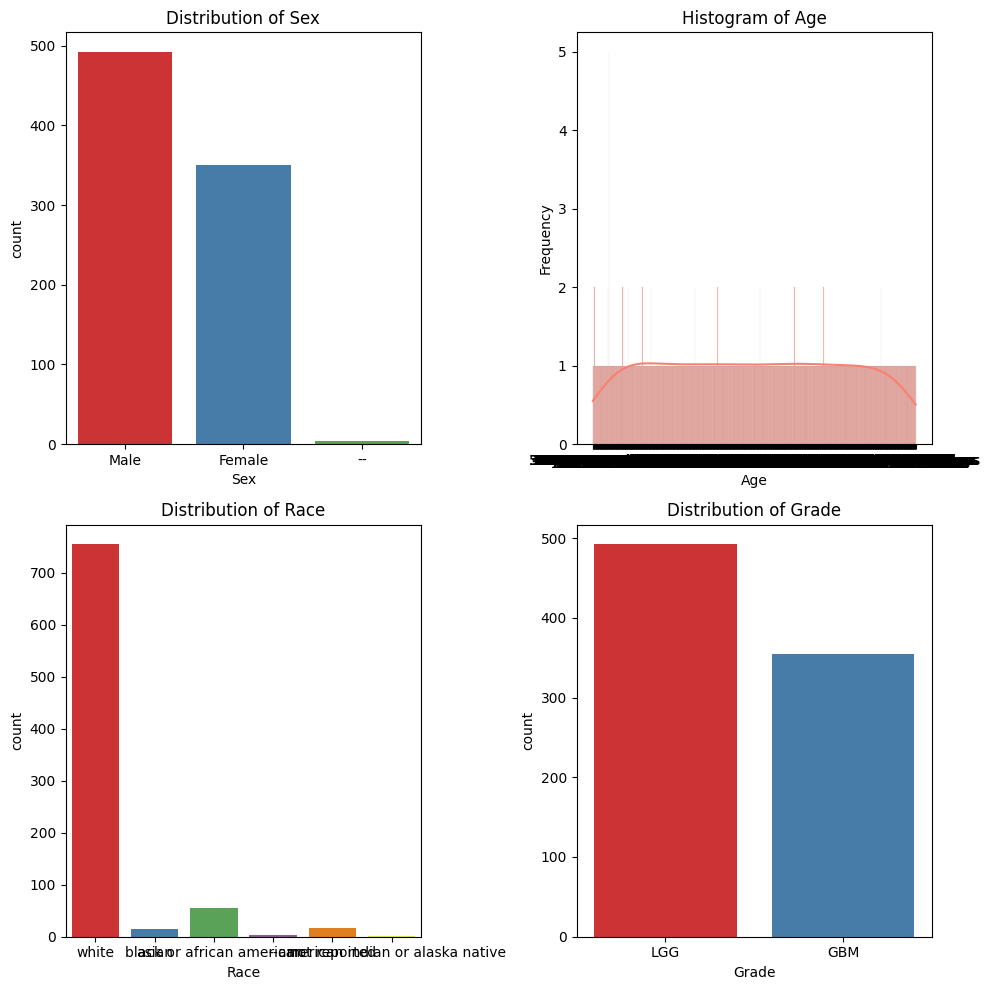

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
sns.countplot(x='Gender', data=df, palette='Set1')
plt.xlabel('Gender')
plt.xlabel('Sex')
plt.title('Distribution of Sex')

plt.subplot(2, 2, 2)
sns.histplot(df['Age_at_diagnosis'], bins=10, kde=True, color='salmon')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')

plt.subplot(2, 2, 3)
sns.countplot(x='Race', data=df, palette='Set1')
plt.xlabel('Race')
plt.xlabel('Race')
plt.title('Distribution of Race')

plt.subplot(2, 2, 4)
sns.countplot(x='Grade', data=df, palette='Set1')
plt.xlabel('Grade')
plt.xlabel('Grade')
plt.title('Distribution of Grade')

plt.tight_layout()
plt.show()

In [ ]:
X[:3]

array([['Male', 18723, 'white', 'MUTATED', 'NOT_MUTATED', 'NOT_MUTATED',
        'NOT_MUTATED', 'NOT_MUTATED', 'NOT_MUTATED', 'NOT_MUTATED',
        'MUTATED', 'NOT_MUTATED', 'NOT_MUTATED', 'MUTATED',
        'NOT_MUTATED', 'NOT_MUTATED', 'NOT_MUTATED', 'NOT_MUTATED',
        'NOT_MUTATED', 'NOT_MUTATED', 'NOT_MUTATED', 'NOT_MUTATED',
        'NOT_MUTATED'],
       ['Male', 14131, 'white', 'MUTATED', 'NOT_MUTATED', 'NOT_MUTATED',
        'NOT_MUTATED', 'NOT_MUTATED', 'MUTATED', 'NOT_MUTATED',
        'NOT_MUTATED', 'NOT_MUTATED', 'NOT_MUTATED', 'NOT_MUTATED',
        'NOT_MUTATED', 'NOT_MUTATED', 'NOT_MUTATED', 'NOT_MUTATED',
        'NOT_MUTATED', 'NOT_MUTATED', 'NOT_MUTATED', 'NOT_MUTATED',
        'NOT_MUTATED'],
       ['Male', 12837, 'white', 'MUTATED', 'MUTATED', 'MUTATED',
        'NOT_MUTATED', 'NOT_MUTATED', 'NOT_MUTATED', 'NOT_MUTATED',
        'NOT_MUTATED', 'NOT_MUTATED', 'NOT_MUTATED', 'NOT_MUTATED',
        'NOT_MUTATED', 'NOT_MUTATED', 'NOT_MUTATED', 'NOT_MUTATED',
     

In [ ]:
for i in range (X.shape[0]):
  for j in range(X.shape[1]):
    if X[i][j]=='Male' or X[i][j]== 'MUTATED' :
      X[i][j] = 1
    if X[i][j]=='Female' or X[i][j]== 'NOT_MUTATED' :
      X[i][j] = 0

In [ ]:
X[:3]

array([[1, 18723, 'white', 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [1, 14131, 'white', 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [1, 12837, 'white', 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0]], dtype=object)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X[0:5])

[[0.0 0.0 0.0 1.0 1 18723 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0]
 [0.0 0.0 0.0 1.0 1 14131 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0.0 0.0 0.0 1.0 1 12837 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0.0 0.0 0.0 1.0 0 11963 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0]
 [0.0 0.0 0.0 1.0 1 11502 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [ ]:
# List of original feature names
original_feature_names = ["race1", "race2", "race3", "race4", "gender", "age","IDH1","TP53", "ATRX", "PTEN",
                          "EGFR","CIC", "MUC16", "PIK3CA", "NF1", "PIK3R1", "FUBP1", "RB1", "NOTCH1", "BCOR",
                          "CSMD3", "SMARCA4", "GRIN2A", "IDH2", "FAT4", "PDGFRA"
                          ]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)
print(Y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 

In [ ]:
test = X[-16:]
test.shape

(16, 26)

In [ ]:
X = X[:846]
X.shape

(846, 26)

In [ ]:
# Splitting dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [ ]:
print(X_train.shape)
print(X_train[:2])
print(X_test.shape)
print(X_test[:2])

(676, 26)
[[0.0 0.0 0.0 1.0 0 26886 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0.0 0.0 0.0 1.0 1 13556 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
(170, 26)
[[0.0 0.0 0.0 1.0 0 23190 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0.0 0.0 0.0 1.0 0 23920 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0]]


In [ ]:
print(y_train.shape)
print(y_train[:3])
print(y_test.shape)
print(y_test[:3])

(676,)
[1 1 1]
(170,)
[0 1 1]


### Model Selection/Evaluation and Hyperparameter Tuning:

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV

In [ ]:
from sklearn.linear_model import LogisticRegression

col_trans = ColumnTransformer([('scaler', StandardScaler(), [5])], remainder='passthrough')
pipeline = Pipeline(steps=[('prep', col_trans), ('model', LogisticRegression(random_state=1))])
params = {
    'model__C': [0.1, 1, 5, 10],
    'model__penalty': ['l1', 'l2'],
    'model__solver': ['liblinear', 'saga']
    }
grid_search = GridSearchCV(pipeline, params, cv=10, n_jobs=-1, verbose=1,return_train_score= True)
grid_search.fit(X_train, y_train)

print("Best parameters :", grid_search.best_params_)
print("Best mean cross-validation score :", grid_search.best_score_)
print("Test-set score", grid_search.score(X_test,y_test))

Fitting 10 folds for each of 16 candidates, totalling 160 fits
Best parameters : {'model__C': 1, 'model__penalty': 'l1', 'model__solver': 'liblinear'}
Best mean cross-validation score : 0.8699297629499562
Test-set score 0.8764705882352941


In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, grid_search.predict(X_test))
# Calculate the accuracy
accuracy = accuracy_score(y_test, grid_search.predict(X_test))
# Calculate the specificity
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
# Calculate the sensitivity
sensitivity = tp / (tp + fn)
print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)

Confusion Matrix:
[[63  6]
 [15 86]]
Accuracy: 0.8764705882352941
Specificity: 0.9130434782608695
Sensitivity: 0.8514851485148515


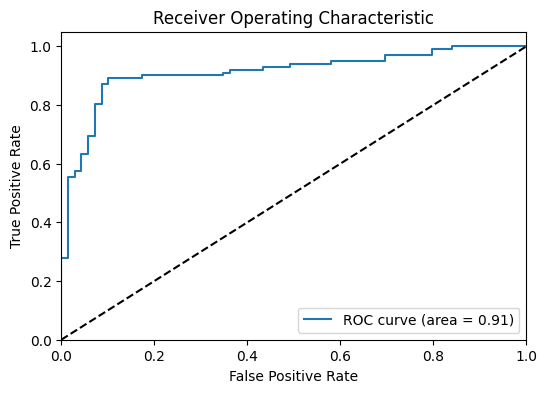

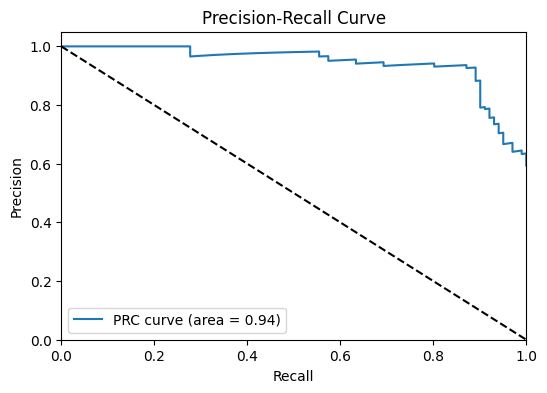

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
# Calculate the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, grid_search.predict_proba(X_test)[:, 1])

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Calculate the precision, recall, and thresholds for the PRC curve
precision, recall, thresholds = precision_recall_curve(y_test, grid_search.predict_proba(X_test)[:, 1])
prc_auc = auc(recall, precision)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot the PRC curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label='PRC curve (area = %0.2f)' % prc_auc)
plt.plot([0, 1], [1, 0], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

col_trans = ColumnTransformer([('scaler', StandardScaler(), [5])], remainder='passthrough')

pipeline = Pipeline(steps=[('prep', col_trans), ('model', DecisionTreeClassifier(random_state=1))])

params = {
    'model__max_depth': [1, 2, 3, 4, 5],
    'model__min_samples_split': [2, 5, 10]
    }

grid_search1 = GridSearchCV(pipeline, params, cv=10, n_jobs=-1, verbose=1,return_train_score= True)

grid_search1.fit(X_train, y_train)

print("Best parameters :", grid_search1.best_params_)
print("Best mean cross-validation score :", grid_search1.best_score_)
print("Test-set score", grid_search1.score(X_test,y_test))


Fitting 10 folds for each of 15 candidates, totalling 150 fits
Best parameters : {'model__max_depth': 5, 'model__min_samples_split': 2}
Best mean cross-validation score : 0.8655618964003512
Test-set score 0.8647058823529412


In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, grid_search1.predict(X_test))
# Calculate the accuracy
accuracy = accuracy_score(y_test, grid_search1.predict(X_test))
# Calculate the specificity
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
# Calculate the sensitivity
sensitivity = tp / (tp + fn)
print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)

Confusion Matrix:
[[63  6]
 [17 84]]
Accuracy: 0.8647058823529412
Specificity: 0.9130434782608695
Sensitivity: 0.8316831683168316


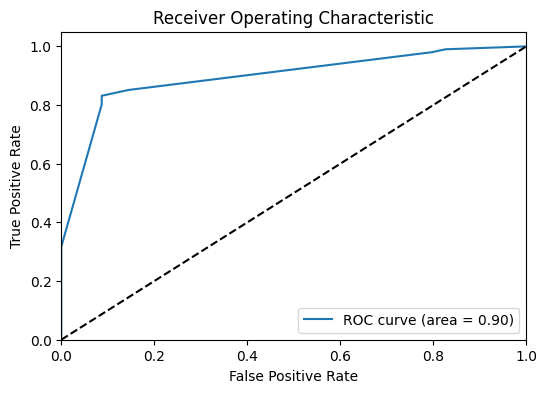

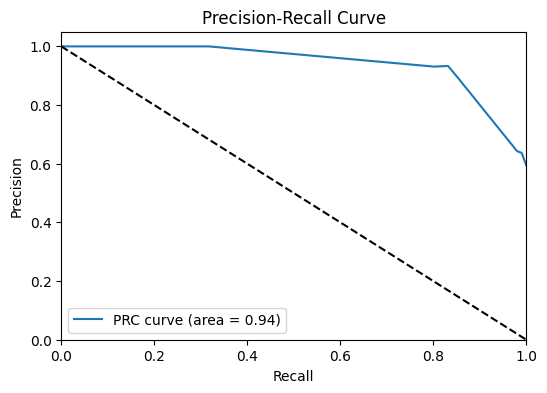

In [ ]:
# Calculate the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, grid_search1.predict_proba(X_test)[:, 1])

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Calculate the precision, recall, and thresholds for the PRC curve
precision, recall, thresholds = precision_recall_curve(y_test, grid_search1.predict_proba(X_test)[:, 1])
prc_auc = auc(recall, precision)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot the PRC curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label='PRC curve (area = %0.2f)' % prc_auc)
plt.plot([0, 1], [1, 0], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

col_trans = ColumnTransformer([('scaler', StandardScaler(), [5])], remainder='passthrough')

pipeline = Pipeline(steps=[('prep', col_trans), ('model', RandomForestClassifier(random_state=1))])

params = {
    'model__n_estimators': [200, 300, 400],
    'model__max_depth': [4, 5, 6],
    'model__min_samples_split': [4, 6, 8]
    }

grid_search2 = GridSearchCV(pipeline, params, cv=10, n_jobs=-1, verbose=1,return_train_score= True)

grid_search2.fit(X_train, y_train)

print("Best parameters :", grid_search2.best_params_)
print("Best mean cross-validation score :", grid_search2.best_score_)
print("Test-set score", grid_search2.score(X_test,y_test))


Fitting 10 folds for each of 27 candidates, totalling 270 fits
Best parameters : {'model__max_depth': 5, 'model__min_samples_split': 6, 'model__n_estimators': 300}
Best mean cross-validation score : 0.8729148375768219
Test-set score 0.8705882352941177


In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, grid_search2.predict(X_test))
# Calculate the accuracy
accuracy = accuracy_score(y_test, grid_search2.predict(X_test))
# Calculate the specificity
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
# Calculate the sensitivity
sensitivity = tp / (tp + fn)
print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)

Confusion Matrix:
[[63  6]
 [16 85]]
Accuracy: 0.8705882352941177
Specificity: 0.9130434782608695
Sensitivity: 0.8415841584158416


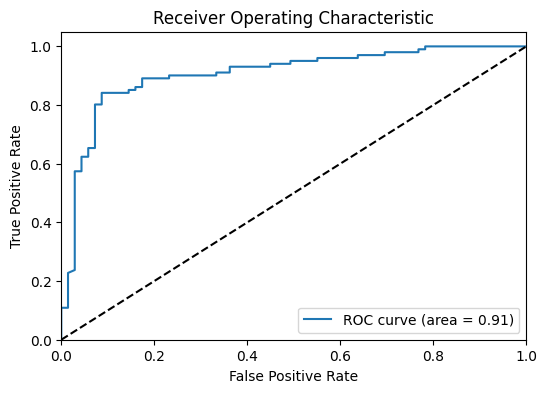

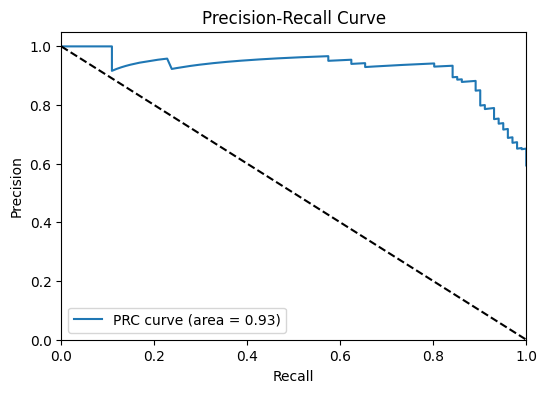

In [ ]:
# Calculate the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, grid_search2.predict_proba(X_test)[:, 1])

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Calculate the precision, recall, and thresholds for the PRC curve
precision, recall, thresholds = precision_recall_curve(y_test, grid_search2.predict_proba(X_test)[:, 1])
prc_auc = auc(recall, precision)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot the PRC curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label='PRC curve (area = %0.2f)' % prc_auc)
plt.plot([0, 1], [1, 0], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

In [ ]:
from sklearn.svm import SVC

col_trans = ColumnTransformer([('scaler', StandardScaler(), [5])], remainder='passthrough')

pipeline = Pipeline(steps=[('prep', col_trans), ('model', SVC(random_state=1, probability=True))])

params = {
    'model__C': [0.1, 1, 5, 10],
    'model__kernel': ['linear', 'rbf'],
    'model__gamma': ['scale', 'auto']
}

grid_search3 = GridSearchCV(pipeline, params, cv=10, n_jobs=-1, verbose=1, return_train_score=True)

grid_search3.fit(X_train, y_train)

print("Best parameters :", grid_search3.best_params_)
print("Best mean cross-validation score :", grid_search3.best_score_)
print("Test-set score", grid_search3.score(X_test,y_test))


Fitting 10 folds for each of 16 candidates, totalling 160 fits


In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, grid_search3.predict(X_test))
# Calculate the accuracy
accuracy = accuracy_score(y_test, grid_search3.predict(X_test))
# Calculate the specificity
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
# Calculate the sensitivity
sensitivity = tp / (tp + fn)
print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)

Confusion Matrix:
[[63  6]
 [17 84]]
Accuracy: 0.8647058823529412
Specificity: 0.9130434782608695
Sensitivity: 0.8316831683168316


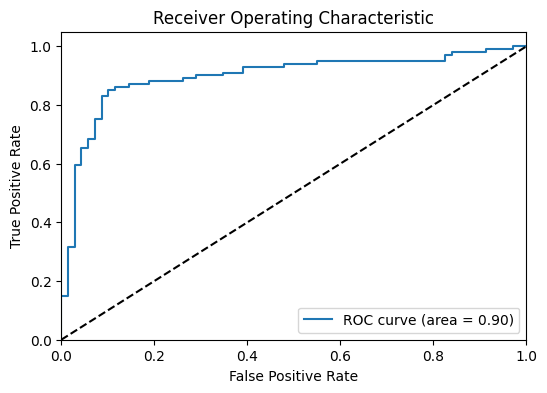

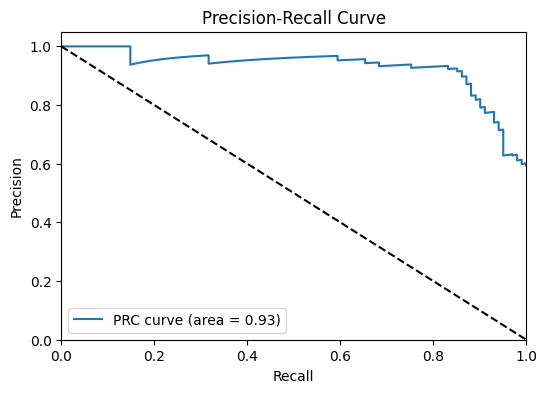

In [ ]:
# Calculate the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, grid_search3.predict_proba(X_test)[:, 1])

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Calculate the precision, recall, and thresholds for the PRC curve
precision, recall, thresholds = precision_recall_curve(y_test, grid_search3.predict_proba(X_test)[:, 1])
prc_auc = auc(recall, precision)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot the PRC curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label='PRC curve (area = %0.2f)' % prc_auc)
plt.plot([0, 1], [1, 0], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

###  Feature Importance Analysis:

In [ ]:
from sklearn.feature_selection import RFE

col_trans = ColumnTransformer([('scaler', StandardScaler(), [5])], remainder='passthrough')

pipeline = Pipeline(steps=[('prep', col_trans), ('feature_selection', RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)), ('model', DecisionTreeClassifier(random_state=1))])

params = {
    'model__max_depth': [1, 2, 3, 4, 5],
    'model__min_samples_split': [2, 5, 10]
    }

grid_search4 = GridSearchCV(pipeline, params, cv=10, n_jobs=-1, verbose=1, return_train_score=True)
grid_search4.fit(X_train, y_train)

print("Best parameters :", grid_search4.best_params_)
print("Best mean cross-validation score :", grid_search4.best_score_)
print("Test-set score", grid_search4.score(X_test,y_test))


Fitting 10 folds for each of 15 candidates, totalling 150 fits
Best parameters : {'model__max_depth': 4, 'model__min_samples_split': 2}
Best mean cross-validation score : 0.8640035118525022
Test-set score 0.8647058823529412


In [ ]:
print(grid_search4.best_estimator_.named_steps['feature_selection'].support_)
selected = grid_search4.best_estimator_.named_steps['feature_selection'].support_

[ True False False False False False  True  True False False False False
 False False False False False False False False False False  True  True
 False False]


In [ ]:
# Print the names of selected features
selected_feature_names = [original_feature_names[i] for i, sel in enumerate(selected) if sel]
print("Selected feature names:", selected_feature_names)

Selected feature names: ['race1', 'IDH1', 'TP53', 'GRIN2A', 'IDH2']


###  Prediction for test.xlsx

In [ ]:
from sklearn.preprocessing import StandardScaler
sta = StandardScaler()
test[:, 5:6] = sta.fit_transform(test[:, 5:6])
print(test)

[[0.0 0.0 0.0 1.0 0 -0.8138462225857098 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [0.0 0.0 0.0 1.0 0 0.023183997129438826 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
  0 0 0 0]
 [0.0 0.0 0.0 1.0 1 -1.2643839392568004 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [0.0 0.0 0.0 1.0 0 -0.09491093435624558 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [0.0 0.0 0.0 1.0 0 -1.5725783921152088 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [0.0 0.0 0.0 1.0 1 0.3130533744124823 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [0.0 0.0 0.0 1.0 1 -1.4783615894095452 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [0.0 0.0 1.0 0.0 0 0.27177567892453935 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [0.0 0.0 1.0 0.0 0 -0.24613908329637746 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
  0 0 0 0]
 [0.0 0.0 0.0 1.0 1 0.4679835588223849 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
  0 0 0]
 [0.0 0.0 0.0 1.0 1 1.3729461294078253 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
  0 0 0]
 [0.0 0.0 0.0 1.0 0 0.7737716886254423 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [0.0

In [ ]:
predictions = grid_search2.predict(test)
print(predictions)

[1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0]
